In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
import os
from datetime import datetime
import seaborn as sns
import Autoencoder.autoencoder as ae

In [3]:
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data = datagen.flow_from_directory('./Data/train', 
                                         class_mode='categorical',target_size=(216, 302),color_mode='grayscale')
test_data = datagen.flow_from_directory('./Data/test', 
                                        class_mode='categorical',target_size=(216, 302),color_mode='grayscale')
val_data = datagen.flow_from_directory('./Data/val', 
                                       class_mode='categorical', target_size=(216, 302),color_mode='grayscale')

Found 6326 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [5]:
print(type(val_data))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [17]:
batch_size = 32

# dimensions of the input images 
# If ran part (1), use the same values here; if not, use the same dimensions the images of input folder
height = 128
width = 256

# instantiate the Autoencoder class
autoencoder = ae.Autoencoder((height, width, 1))

# define the network to use (convolutional)
autoencoder.set_convolutional_network()

import tensorflow.keras.optimizers.legacy  

# number of iterations in training (try using large value)
epochs = 500
loss = "binary_crossentropy" # use this as pxies are normalized to [0,1]
lr = 0.001

model_save_path = f"./trained_models/"

# compile the autoencoder model
# @ TWEAK to search for good model. Can change the optimizer or loss function
autoencoder.compile(optimizer=tensorflow.keras.optimizers.legacy.Adam(learning_rate=lr), loss=loss)

# train the model
autoencoder.train(train_data, test_data, epochs=epochs)
autoencoder.summary()
# autoencoder.save(model_save_path)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [225]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def dashboard_train(model, xtrain, ytrain, ls = ['COVID-19', 'Normal', 'Pneumonia', 'Tuberculosis']):
    plt.figure(figsize=(6,6))
    pred = model.predict(xtrain)
    report = pd.DataFrame(classification_report(ytrain, pred, target_names = ls, output_dict=True))
    cm = confusion_matrix(ytrain, pred)
    print("Train Result: \n ================================================")
    print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{report}\n")
    ls = ['COVID-19', 'Normal', 'Pneumonia', 'Tuberculosis']
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels= ls, yticklabels=ls).set_title('Train Set Confusion Matrix')

def dashboard_test(model, xtest, ytest, ls = ['COVID-19', 'Normal', 'Pneumonia', 'Tuberculosis']):
    plt.figure(figsize=(6,6))
    pred = model.predict(xtest)
    report = pd.DataFrame(classification_report(ytest, pred, target_names=ls, output_dict=True))
    cm = confusion_matrix(ytest, pred)
    print("Test Result: \n ================================================")        
    print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{report}\n")
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels= ls, yticklabels=ls).set_title('Test Set Confusion Matrix')

Train Result: 
Accuracy Score: 86.18%
_______________________________________________
CLASSIFICATION REPORT:
             COVID-19       Normal    Pneumonia  Tuberculosis  accuracy  \
precision    0.963504     0.922190     0.828528      0.976974   0.86184   
recall       0.860870     0.477256     0.986323      0.913846   0.86184   
f1-score     0.909300     0.628993     0.900566      0.944356   0.86184   
support    460.000000  1341.000000  3875.000000    650.000000   0.86184   

             macro avg  weighted avg  
precision     0.922799      0.873451  
recall        0.809574      0.861840  
f1-score      0.845803      0.848131  
support    6326.000000   6326.000000  



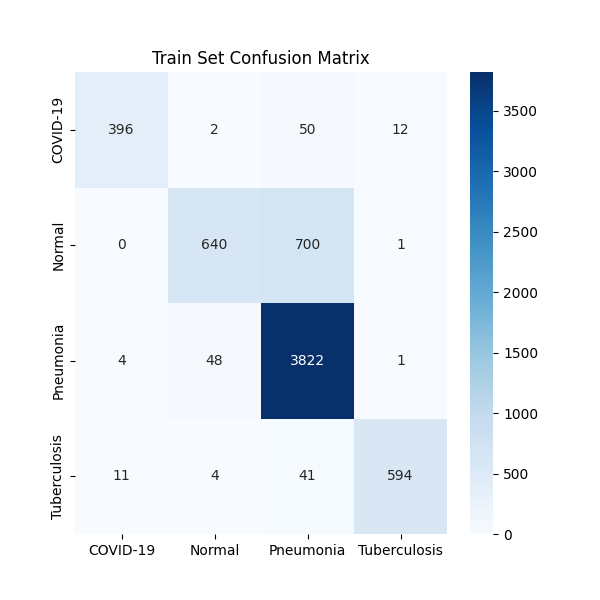

In [226]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#switch to looking at pneumonia vs tuberculosis and normal vs covid or covid vs pneumonia or normal vs tuberculosis
svc1 = SVC(kernel="poly",degree=5)

# Training the model on the training data and labels
svc1.fit(images_pca, labels)
dashboard_train(svc1, images_pca, labels)

Test Result: 
Accuracy Score: 51.10%
_______________________________________________
CLASSIFICATION REPORT:
             COVID-19      Normal   Pneumonia  Tuberculosis  accuracy  \
precision    0.514286    0.190476    0.574503      0.246377  0.511025   
recall       0.169811    0.051282    0.889744      0.414634  0.511025   
f1-score     0.255319    0.080808    0.698189      0.309091  0.511025   
support    106.000000  234.000000  390.000000     41.000000  0.511025   

            macro avg  weighted avg  
precision    0.381411      0.432222  
recall       0.381368      0.511025  
f1-score     0.335852      0.429234  
support    771.000000    771.000000  



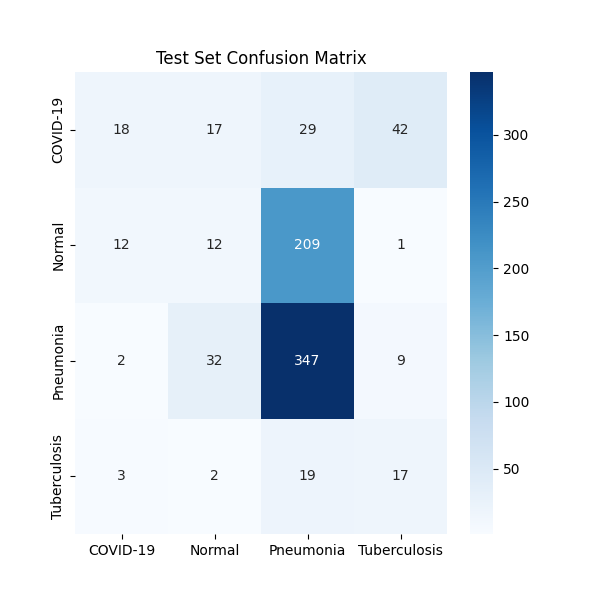

In [227]:
dashboard_test(svc1, images_pca_test, labels_test)

In [200]:
#train indices
covid_norm_idx =  np.argwhere(np.logical_or(labels == 0,labels == 1)).flatten()
tuber_pneum_idx =  np.argwhere(np.logical_or(labels == 3,labels == 2)).flatten()
#test indices
covid_norm_idx_test =  np.argwhere(np.logical_or(labels_test == 0,labels_test == 1)).flatten()
tuber_pneum_idx_test =  np.argwhere(np.logical_or(labels_test == 3,labels_test == 2)).flatten()

In [201]:
#train data
covid_norm_images_data = images_data[covid_norm_idx]
covid_norm_labels = labels[covid_norm_idx]

tuber_pneum_image_data = images_data[tuber_pneum_idx]
tuber_pneum_labels = labels[tuber_pneum_idx]

#test data
covid_norm_images_data_test = images_data_test[covid_norm_idx_test]
covid_norm_labels_test = labels_test[covid_norm_idx_test]

tuber_pneum_image_data_test = images_data_test[tuber_pneum_idx_test]
tuber_pneum_labels_test = labels_test[tuber_pneum_idx_test]

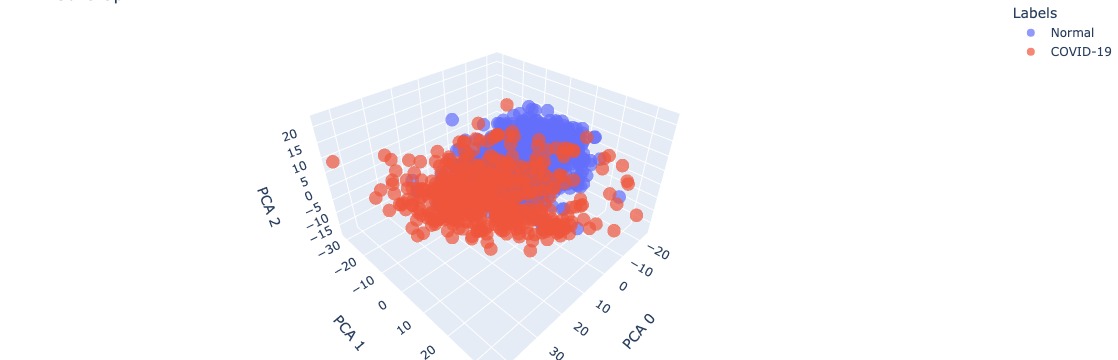

In [202]:
pca3d = PCA(n_components=n_c)
reduced_data3d = pca3d.fit_transform(covid_norm_images_data)
df_3d = pd.DataFrame(reduced_data3d, columns=cols)
df_3d['Labels'] = [named_labels[i] for i in covid_norm_idx]
fig_3d = px.scatter_3d(df_3d, x=cols[0], y=cols[1], z=cols[2], color='Labels',
                               title="3d Graph", size_max=0.5, opacity=0.7)
fig_3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig_3d.show()

In [184]:
pca = PCA(n_components=10)
covid_norm_pca = pca.fit_transform(covid_norm_images_data)
tuber_pneum_pca = pca.fit_transform(tuber_pneum_image_data)
covid_norm_pca_test = pca.fit_transform(covid_norm_images_data_test)
tuber_pneum_pca_test = pca.fit_transform(tuber_pneum_image_data_test)

In [207]:
def dashboard_train2(model, xtrain, ytrain, ls):
    plt.figure(figsize=(6,6))
    pred = model.predict(xtrain)
    report = pd.DataFrame(classification_report(ytrain, pred, target_names = ls, output_dict=True))
    cm = confusion_matrix(ytrain, pred)
    print("Train Result: \n ================================================")
    print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{report}\n")
    ax3 = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels= ls, yticklabels=ls).set_title('Train Set Confusion Matrix')
    ax3.set(xlabel='common xlabel', ylabel='common ylabel')
    plt.show()
    # plt.show()
    # plt.clf()
def dashboard_test2(model, xtest, ytest, ls):
    plt.figure(figsize=(6,6))
    pred = model.predict(xtest)
    report = pd.DataFrame(classification_report(ytest, pred, target_names=ls, output_dict=True))
    cm = confusion_matrix(ytest, pred)
    print("Test Result: \n ================================================")        
    print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{report}\n")
    ax4 = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels= ls, yticklabels=ls).set_title('Test Set Confusion Matrix')
    ax4.set(xlabel='common xlabel', ylabel='common ylabel')
    plt.show()  
    # plt.show()
    # plt.clf()

Train Result: 
Accuracy Score: 98.06%
_______________________________________________
CLASSIFICATION REPORT:
             COVID-19       Normal  accuracy    macro avg  weighted avg
precision    0.997658     0.975255  0.980566     0.986456      0.980977
recall       0.926087     0.999254  0.980566     0.962671      0.980566
f1-score     0.960541     0.987109  0.980566     0.973825      0.980323
support    460.000000  1341.000000  0.980566  1801.000000   1801.000000



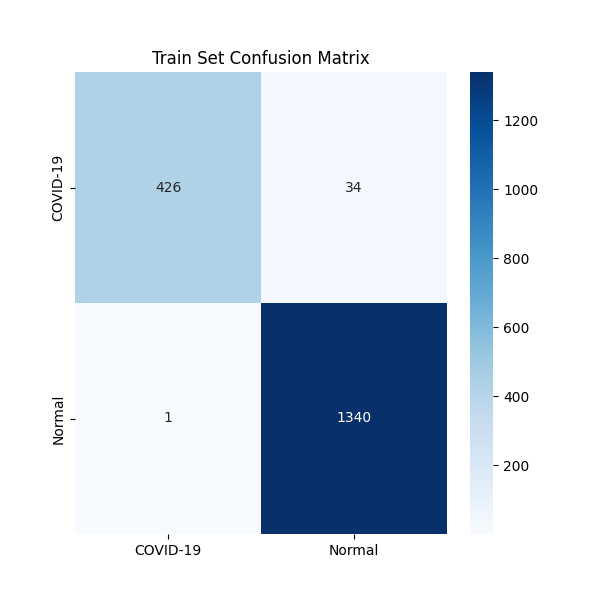

In [208]:
svc1.fit(covid_norm_pca, covid_norm_labels)
dashboard_train2(svc1, covid_norm_pca, covid_norm_labels, ls = ['COVID-19', 'Normal'])

Test Result: 
Accuracy Score: 87.94%
_______________________________________________
CLASSIFICATION REPORT:
             COVID-19      Normal  accuracy   macro avg  weighted avg
precision    0.857143    0.887550  0.879412    0.872347      0.878070
recall       0.735849    0.944444  0.879412    0.840147      0.879412
f1-score     0.791878    0.915114  0.879412    0.853496      0.876693
support    106.000000  234.000000  0.879412  340.000000    340.000000



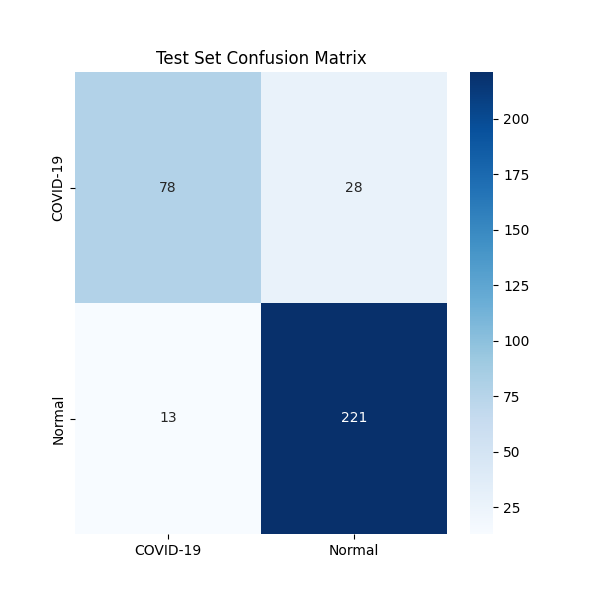

In [209]:
dashboard_test2(svc1, covid_norm_pca_test, covid_norm_labels_test, ls = ['COVID-19', 'Normal'])

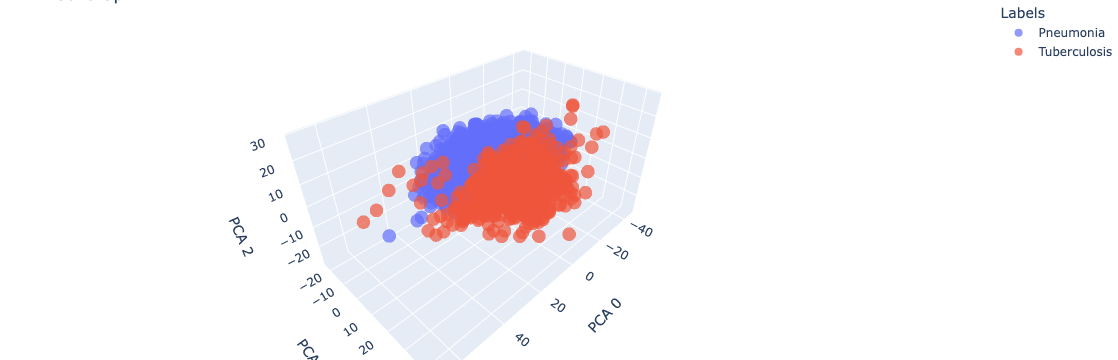

In [210]:
pca3d = PCA(n_components=n_c)
reduced_data3d = pca3d.fit_transform(tuber_pneum_image_data)
df_3d = pd.DataFrame(reduced_data3d, columns=cols)
df_3d['Labels'] = [named_labels[i] for i in tuber_pneum_idx]
fig_3d = px.scatter_3d(df_3d, x=cols[0], y=cols[1], z=cols[2], color='Labels',
                               title="3d Graph", size_max=0.5, opacity=0.7)
fig_3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig_3d.show()

Train Result: 
Accuracy Score: 99.14%
_______________________________________________
CLASSIFICATION REPORT:
             Pneumonia  Tuberculosis  accuracy    macro avg  weighted avg
precision     0.990537      0.996748  0.991381     0.993643      0.991429
recall        0.999484      0.943077  0.991381     0.971280      0.991381
f1-score      0.994990      0.969170  0.991381     0.982080      0.991281
support    3875.000000    650.000000  0.991381  4525.000000   4525.000000



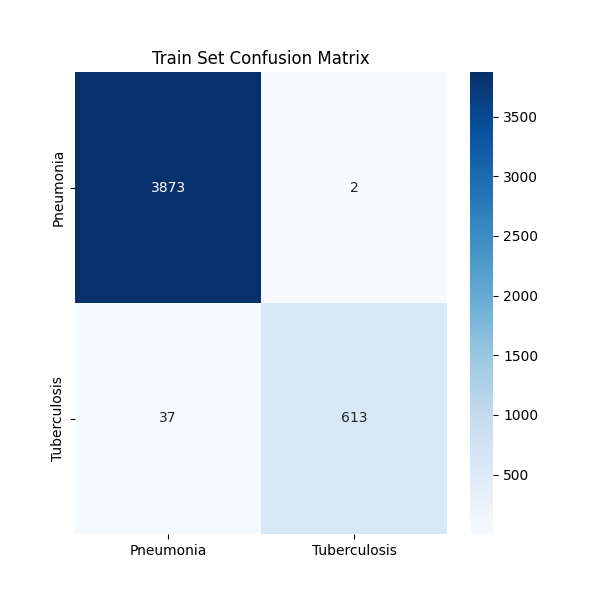

In [212]:
svc1.fit(tuber_pneum_pca, tuber_pneum_labels)
dashboard_train2(svc1, tuber_pneum_pca, tuber_pneum_labels, ls = ['Pneumonia', 'Tuberculosis'])


Test Result: 
Accuracy Score: 91.88%
_______________________________________________
CLASSIFICATION REPORT:
            Pneumonia  Tuberculosis  accuracy   macro avg  weighted avg
precision    0.947103      0.588235  0.918794    0.767669      0.912965
recall       0.964103      0.487805  0.918794    0.725954      0.918794
f1-score     0.955527      0.533333  0.918794    0.744430      0.915365
support    390.000000     41.000000  0.918794  431.000000    431.000000



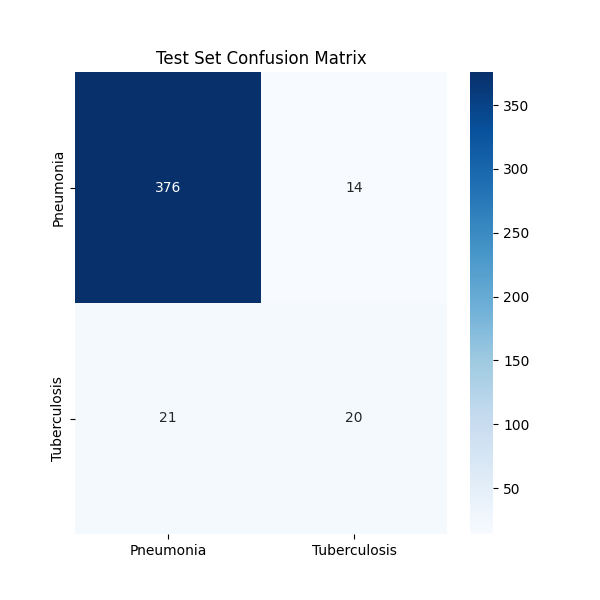

In [213]:
dashboard_test(svc1, tuber_pneum_pca_test, tuber_pneum_labels_test, ls = ['Pneumonia', 'Tuberculosis'])